###                                                       **Data Preprocessing** 📉🧹🗂️🔄

Is like getting "your ingredients ready before cooking" 🍳 It’s the process of cleaning, organizing, and transforming raw data to make it ready for

analysis or machine learning models.

**Why is it important?**

Imagine trying to bake a cake with dirty, mismatched ingredients 💩🍰

it's not going to work! ❌


- **Real-world data is messy:** It may have missing, incorrect, or inconsistent values. 

- **Models need clean input:** Machine learning algorithms perform better with well-prepared data. 

- **Ensures fairness:** Removes biases or errors in the dataset.

💡By preprocessing, we make sure our data is accurate, consistent, and suitable for producing reliable results. 🎂✅

**Exciting News !** 🎉

Our dataset is in great shape:  

- **No missing values** 🚫🕳️: Every piece of data is present and accounted for!  

- **No duplicates** 🚫🔁: No extra baggage to slow us down.  


Ready for smooth preprocessing and analysis! 🚀📊  

In [35]:
import pandas as pd  # type: ignore
from PIL import Image # type: ignore

# Encoding
from sklearn.preprocessing import LabelEncoder

# Visualization - Plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
#read the data 
data = pd.read_csv(r"C:\Users\MSI\Fraud detction MLops Project\data\fraud_oracle.csv")
data.shape

(15420, 33)

In [5]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


Our data is currently a sprawling mansion (15420 rows, 33 columns) 🏰

Time to renovate and downsize it into a cozy apartment =less clutter, more value!*🏠✨ -->

In [6]:
df=data.copy()

-----

#### **Data reduction**

**🚀 Based on EDA insights, dropping irrelevant columns for a leaner dataset—because sometimes less is more!** 🎯


- **Month** and **MonthClaimed**  have similar distributions => drop 1 ,i will drop Month

- other features related to "Date" 

- PolicyNumber: The unique identifier for the insurance policy.=> identifier =>drop 

-  RepNumber also irrelavant

In [7]:
useless_columns = ['Month', 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 'WeekOfMonthClaimed', 'PolicyNumber', 'RepNumber', 'Days_Policy_Accident','Days_Policy_Claim']
df=df.drop(columns=useless_columns,axis=1)
df.shape

(15420, 24)

----

### **Transform the Categorical Values** 

Machine learning models work with **numerical inputs**, so converting categorical data into numerical form is essential.😊

Proper encoding ensures the model understands relationships (order for ordinal variables and uniqueness for nominal variables).

Inappropriate encoding might introduce bias or lead to poor model performance.

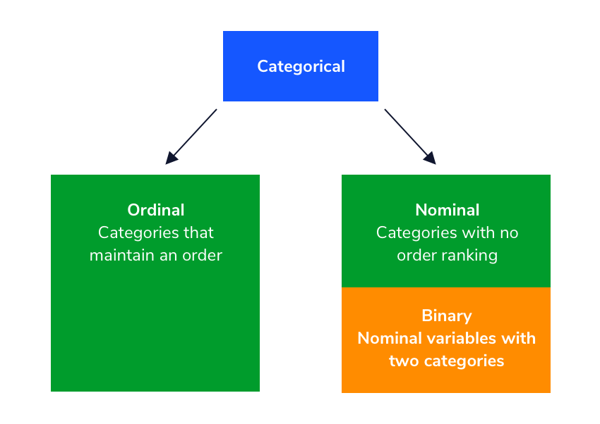

In [8]:
image_path = r"C:\Users\MSI\Fraud detction MLops Project\notebooks\images\Intro_to_variable_types_3.webp"
image = Image.open(image_path)
new_width = 600 
aspect_ratio = image.height / image.width
new_height = int(new_width * aspect_ratio)
resized_image = image.resize((new_width, new_height))

resized_image

Categorical Variables (Blue Box):The values do not represent numerical magnitudes but rather categories, which could have order or no order.

Ordinal Variables (Green Box):Categories have a meaningful order or ranking. Example: Education level (High School < Bachelor's < Master's < Ph.D.).

Nominal Variables (Green Box):Categories have no inherent order or ranking.Example: Colors (Red, Blue, Green).

Binary Variables (Orange Box):A special case of nominal variables with only two categories. Example: Yes/No, Male/Female.

----

#### **Encoding Categorical Variables (Binary Variable) - Label Encoding**

In [9]:
Binary_columns=[col for col in df.columns if df[col].nunique()==2 and col!="FraudFound_P"]
Binary_columns

['AccidentArea',
 'Sex',
 'Fault',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType']

Binary variables are : AccidentArea, Sex, Fault, PoliceReportFiled, WitnessPresent, AgentType => map them to 0 and 1.

In [10]:
le=LabelEncoder()

for col in Binary_columns :
    df[col]=le.fit_transform(df[col])
    print('Label Mapping', dict(zip(le.classes_,le.transform(le.classes_))))

Label Mapping {'Rural': 0, 'Urban': 1}
Label Mapping {'Female': 0, 'Male': 1}
Label Mapping {'Policy Holder': 0, 'Third Party': 1}
Label Mapping {'No': 0, 'Yes': 1}
Label Mapping {'No': 0, 'Yes': 1}
Label Mapping {'External': 0, 'Internal': 1}


In [11]:
df1=df.copy()

----

#### **Encoding Categorical Variables (Ordinal Categorical Variables & Nominal Categorical Variables) - Label Encoding**

In [12]:
categorical_columns = df1.select_dtypes(include=['object', 'category']).columns
[col for col in categorical_columns if df1[col].nunique()!=2] #Categorical and not binary 

['Make',
 'MonthClaimed',
 'MaritalStatus',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'BasePolicy']

___

**BasePolicy** contains 3 categories : 'Liability', 'Collision', 'All Perils' => ordinal categorical variable (maintain an order)

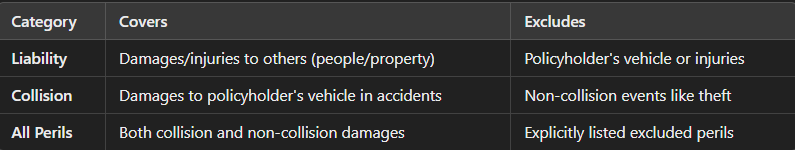

In [13]:
Image2=Image.open(r"C:\Users\MSI\Fraud detction MLops Project\notebooks\images\BasePolicy.png")
Image2

In [14]:
df1["BasePolicy"] = df1["BasePolicy"].str.lower()
basepolicy_label = {'liability': 0, 'collision': 1, 'all perils': 2}
df1["BasePolicy"] = df1["BasePolicy"].map(basepolicy_label)
df1["BasePolicy"]

0        0
1        1
2        1
3        0
4        1
        ..
15415    1
15416    0
15417    1
15418    2
15419    1
Name: BasePolicy, Length: 15420, dtype: int64

_____

**VehiclePrice** into a binary variable rather than an ordinal one, This decision was based on the fact that the categories "more than 69000" and "less than 

20000" have the highest fraud rates, showing that the feature does not follow an ordinal pattern. 

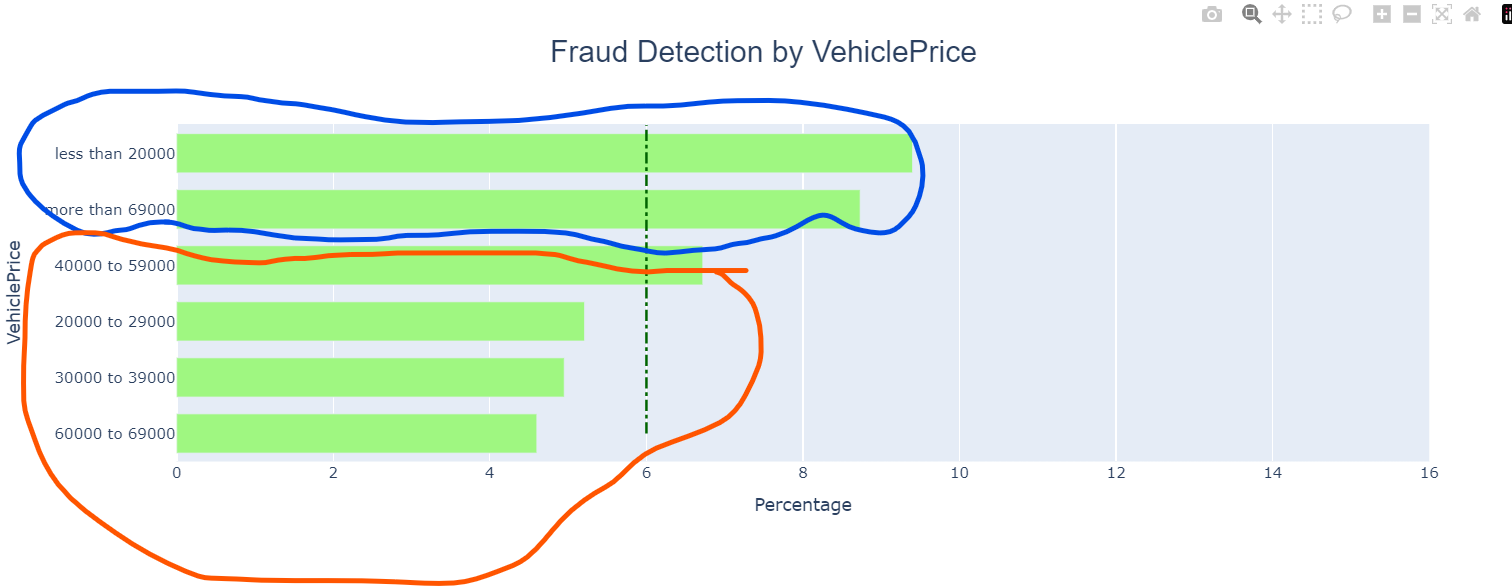

In [15]:
Image3=Image.open(r"C:\Users\MSI\Fraud detction MLops Project\notebooks\images\Vehicle price.png")
Image3

In [16]:
df1['VehiclePrice'] = df1['VehiclePrice'].str.lower()

vehicleprice_label = {'more than 69000': 1, '20000 to 29000': 0, '30000 to 39000': 0, 
                      'less than 20000': 1, '40000 to 59000': 1, '60000 to 69000': 0}
df1['VehiclePrice'] = df1['VehiclePrice'].map(vehicleprice_label)
df1['VehiclePrice']

0        1
1        1
2        1
3        0
4        1
        ..
15415    0
15416    0
15417    0
15418    0
15419    0
Name: VehiclePrice, Length: 15420, dtype: int64

_____

 **"AgeOfVehicle"** into a nominal categorical variable for the same reason as **"VehiclePrice."** However, this feature can be re-classified into 3 categories.

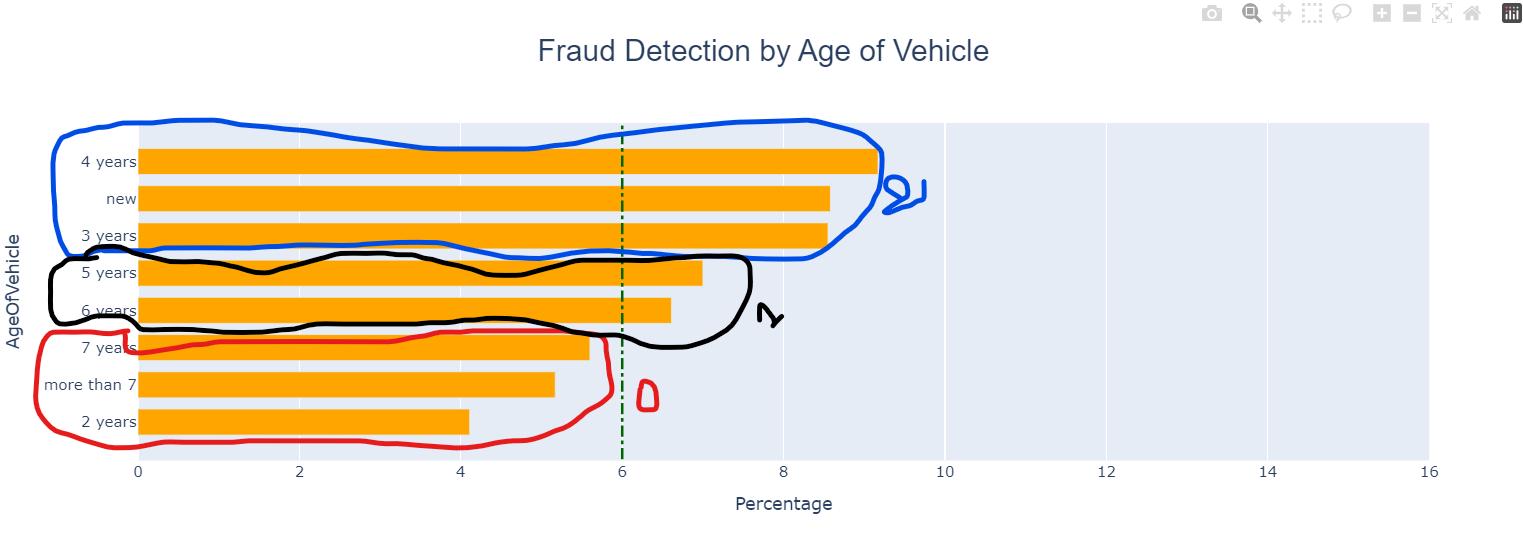

In [17]:
Image4=Image.open(r"C:\Users\MSI\Fraud detction MLops Project\notebooks\images\AgeOfVehicle.png")
Image4

In [18]:
ageofvehicle_label = {'new': 2, '2 years': 0, '3 years': 2, '4 years': 2, '5 years': 1, '6 years': 1, '7 years': 0, 'more than 7': 0}
df1['AgeOfVehicle']=df1['AgeOfVehicle'].map(ageofvehicle_label)
df1['AgeOfVehicle']

0        2
1        1
2        0
3        0
4        1
        ..
15415    1
15416    1
15417    1
15418    0
15419    1
Name: AgeOfVehicle, Length: 15420, dtype: int64

---

**Driver Rating**

In [34]:
df1['DriverRating'].unique()

array([1, 4, 3, 2], dtype=int64)

The feature "DriverRating" is already a numeric feature

---


**Make**

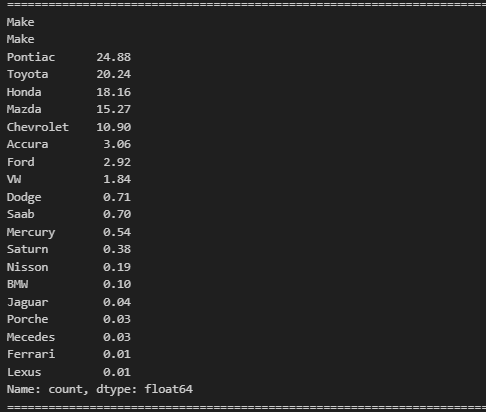

In [19]:
Image5=Image.open(r'C:\Users\MSI\Fraud detction MLops Project\notebooks\images\Make.png')
Image5

In [20]:
frequency=round(df1["Make"].value_counts()/len(df1)*100,2).to_frame(name="percentage")
frequency.reset_index(inplace=True)
frequency.columns = ["Make", "Percentage"]
frequency

,Make,Percentage
0,Pontiac,24.88
1,Toyota,20.24
2,Honda,18.16
3,Mazda,15.27
4,Chevrolet,10.90
5,Accura,3.06
6,Ford,2.92
7,VW,1.84
8,Dodge,0.71
9,Saab,0.70


In [21]:
low_frequency_makes = frequency[frequency["Percentage"] <= 4.0]["Make"]
df1['Make'] = df1['Make'].apply(lambda x: "Other" if x in low_frequency_makes.values else x)

In [22]:
frequency=round(df1["Make"].value_counts()/len(df1)*100,2).to_frame(name="percentage")
frequency

,percentage
Make,
Pontiac,24.88
Toyota,20.24
Honda,18.16
Mazda,15.27
Chevrolet,10.90
Other,10.54


I'll group Accura, Ford, VW, and others into a single category (let's give it a shot!)

In [23]:
print(df1['Make'].unique())

['Honda' 'Toyota' 'Other' 'Mazda' 'Chevrolet' 'Pontiac']


In [24]:
df2=df1.copy()

____

#### **One-hot Encoding (Other categorical variables)**

**One-Hot Encoding Explained 🍕🎉**

Imagine a Pizza Topping Party 🍕🎈  

You’re at a pizza party, and everyone is voting for their favorite topping. The options are:


- 🍍 (Pineapple)  

- 🧀 (Cheese)  

- 🌶️ (Pepperoni)  
---

**Problem: How to Record Everyone’s Votes?** 🤔

You need a way to represent everyone’s topping choice, but you can’t just write "🍍", "🧀", or "🌶️" because computers like **numbers** more than emojis or 

words! So, we use **one-hot encoding**!

---

**What Does One-Hot Encoding Do?** 🤓

1. It creates a **separate column** for each topping:  

   - 🍍 (Pineapple)  


   - 🧀 (Cheese)  

   - 🌶️ (Pepperoni)  

2. In each row, it says **yes (1)** or **no (0)** for each topping: 


| 🍍 | 🧀 | 🌶️ |  
|----|----|----|  
|  1 |  0 |  0 |           → Loves Pineapple ❤️  
|  0 |  1 |  0 |           → Loves Cheese 🧀  
|  0 |  0 |  1 |           → Loves Pepperoni 🌶️  
|  1 |  0 |  0 |           → Loves Pineapple again 🍍 


---


 **Why It’s Fun and Useful? 😎**

- Computers now know exactly who loves what without any confusion. 

- No mixed signals like "What’s a 🍍 + 🧀 + 🌶️ combo?" Each topping has its **own spotlight**! ✨  


---

**In Short:**

🧠 **One-hot encoding** = Giving each choice its **own column** and saying "1 for yes, 0 for no" 🔢. 

Now your pizza party (or dataset) is ready for some AI magic! 🎉✨

---

**The Deductible** in insurance is the amount of money the policyholder (the insured person) agrees to pay out of pocket before the insurance company starts covering the remaining costs of a claim.

For Example: If your deductible is $500 and your repair costs are $2,000, you would pay $500, and the insurance company would cover the remaining $1,500.

**The Deductible** : 4 categories [300, 400, 500, 700] => to string 

**Year**	int64	3 categories =>	[1994, 1995, 1996] => change to string before One-hot-encoding

In [25]:
dtype_change_string = ['Deductible', 'Year']
for col in dtype_change_string:
    df2[col]=df2[col].astype(str)

In [26]:
onehot_encoding_columns = [ 'Make','MonthClaimed', 'MaritalStatus', 'PolicyType', 'VehicleCategory', 'Deductible', 'PastNumberOfClaims', 'AgeOfPolicyHolder', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year']
print("The number of one-hot encoding target features: ", len(onehot_encoding_columns))

The number of one-hot encoding target features:  12


In [27]:
df2= pd.get_dummies(df2, columns=onehot_encoding_columns)
df2.shape

(15420, 81)

**One-hot encoding** creates new binary columns for each unique value in the categorical columns. Instead of keeping one column, it splits the data into several columns, where each column represents one unique category, and

 the values are 0 or 1.

**One-hot encoding** is like throwing a party 🎉 where every unique category gets its own VIP table 🪑, and they only invite two guests: **0** and **1**. 


**The result?** A much *wider* room (our dataset), but hey, at least everyone feels special! 😄


In [28]:
print(df2.columns)

Index(['AccidentArea', 'Sex', 'Age', 'Fault', 'VehiclePrice', 'FraudFound_P',
       'DriverRating', 'AgeOfVehicle', 'PoliceReportFiled', 'WitnessPresent',
       'AgentType', 'BasePolicy', 'Make_Chevrolet', 'Make_Honda', 'Make_Mazda',
       'Make_Other', 'Make_Pontiac', 'Make_Toyota', 'MonthClaimed_0',
       'MonthClaimed_Apr', 'MonthClaimed_Aug', 'MonthClaimed_Dec',
       'MonthClaimed_Feb', 'MonthClaimed_Jan', 'MonthClaimed_Jul',
       'MonthClaimed_Jun', 'MonthClaimed_Mar', 'MonthClaimed_May',
       'MonthClaimed_Nov', 'MonthClaimed_Oct', 'MonthClaimed_Sep',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Widow',
       'PolicyType_Sedan - All Perils', 'PolicyType_Sedan - Collision',
       'PolicyType_Sedan - Liability', 'PolicyType_Sport - All Perils',
       'PolicyType_Sport - Collision', 'PolicyType_Sport - Liability',
       'PolicyType_Utility - All Perils', 'PolicyType_Utility - Collision',
       'PolicyType_Util

In [29]:
onehot_encoded_columns = [col for col in df2.columns if '_' in col]
onehot_encoded_columns.remove("FraudFound_P")
print("The Number of One-hot Encoded Columns: ", len(onehot_encoded_columns))

The Number of One-hot Encoded Columns:  69


In [30]:
onehot_encoded_columns

['Make_Chevrolet',
 'Make_Honda',
 'Make_Mazda',
 'Make_Other',
 'Make_Pontiac',
 'Make_Toyota',
 'MonthClaimed_0',
 'MonthClaimed_Apr',
 'MonthClaimed_Aug',
 'MonthClaimed_Dec',
 'MonthClaimed_Feb',
 'MonthClaimed_Jan',
 'MonthClaimed_Jul',
 'MonthClaimed_Jun',
 'MonthClaimed_Mar',
 'MonthClaimed_May',
 'MonthClaimed_Nov',
 'MonthClaimed_Oct',
 'MonthClaimed_Sep',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'MaritalStatus_Widow',
 'PolicyType_Sedan - All Perils',
 'PolicyType_Sedan - Collision',
 'PolicyType_Sedan - Liability',
 'PolicyType_Sport - All Perils',
 'PolicyType_Sport - Collision',
 'PolicyType_Sport - Liability',
 'PolicyType_Utility - All Perils',
 'PolicyType_Utility - Collision',
 'PolicyType_Utility - Liability',
 'VehicleCategory_Sedan',
 'VehicleCategory_Sport',
 'VehicleCategory_Utility',
 'Deductible_300',
 'Deductible_400',
 'Deductible_500',
 'Deductible_700',
 'PastNumberOfClaims_1',
 'PastNumberOfClaims_2 to 4',
 'PastNumberO

In [31]:
constant_features = []
for col in onehot_encoded_columns:
    if df2[col].sum() <= 8:
        constant_features.append(col)
print("The Number of Constant Features: ", len(constant_features))

The Number of Constant Features:  5


In [32]:
constant_features

['MonthClaimed_0',
 'PolicyType_Sport - Liability',
 'Deductible_300',
 'AddressChange_Claim_under 6 months',
 'NumberOfCars_more than 8']

In [33]:
df2.drop(columns=constant_features, axis=1, inplace=True)
df2.shape

(15420, 76)

---

**Correcting Inaccurate Data & Handling Outliers (Age)**

It's time to handle "Age", the only continuous feature in this dataset, 

In [36]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Histogram of Age", "Box Plot of Age"))

# Histogram
fig.add_trace(go.Histogram(x=df2['Age'], nbinsx=100), row=1, col=1)
# Box Plot
fig.add_trace(go.Box(x=df2['Age']), row=1, col=2)

fig.update_layout(
    title={
        'text': 'Distribution of Age', 'x':0.5,
        'xanchor': 'center', 'yanchor': 'top',
        'font': {'family': 'Arial, sans-serif', 'size': 24}
    }, showlegend=False
)

fig.show()